In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("MP_Data.tsv", sep='\t', index_col=False)
tt_df=df.rename(columns={'x':'test_train'})
tt_df.head()

,test_train
0,Train
1,Train
2,Train
3,Train
4,Train


In [3]:
x_df=pd.read_csv("MP_Descriptors.tsv", sep='\t', index_col=False)
x_df.head()

,diameter,petitjean,petitjeanSC,radius,VDistEq,VDistMa,weinerPath,weinerPol,a_aro,a_count,...,FASA_P,FCASA.,FCASA..1,VSA,dens,glob,std_dim1,std_dim2,std_dim3,vol
0,5,0.400000,0.666667,3,2.037476,6.011166,82,9,6,15,...,0.129128,0.326050,0.224950,138.13699,0.958985,0.031032,1.853123,1.382682,0.326444,123.18750
1,9,0.444444,0.800000,5,2.954872,8.805204,1046,40,11,31,...,0.059026,0.847237,1.136764,296.30197,1.296254,0.258447,2.394159,1.966377,1.217135,262.82812
2,10,0.500000,1.000000,5,3.083532,8.211762,742,24,12,35,...,0.046707,0.817581,0.464419,296.54431,0.946322,0.162139,3.164745,1.552043,1.274330,266.62500
3,7,0.428571,0.750000,4,2.616827,7.313269,288,20,10,20,...,0.044688,0.417896,0.574827,187.43799,1.195242,0.018573,2.524826,1.446899,0.344087,164.95312
4,7,0.428571,0.750000,4,2.609669,6.833154,203,13,6,22,...,0.103925,0.595412,0.267278,193.42802,0.978233,0.088156,2.550456,1.430062,0.757260,165.79688


In [4]:
df=pd.read_csv("MP_Outcome.tsv", sep='\t')
y_df=df.rename(columns={'x':'outcome'})
y_df.head()

,outcome
0,14.0
1,20.5
2,27.5
3,30.5
4,31.0


In [5]:
x_train_df = x_df[tt_df['test_train'] == 'Train']
x_test_df = x_df[tt_df['test_train'] == 'Test']
y_train_df = y_df[tt_df['test_train'] == 'Train']
y_test_df = y_df[tt_df['test_train'] == 'Test']

In [6]:
#def generate_dataset(X_train,X_test, n_features, noise=0.1):
x_scaler = StandardScaler()
x_train = x_scaler.fit_transform(x_train_df)
x_test = x_scaler.transform(x_test_df)
x_train.shape, x_test.shape

((4126, 202), (275, 202))

In [7]:
y_scaler= StandardScaler()
y_train = y_scaler.fit_transform(y_train_df)
y_test = y_scaler.transform(y_test_df)
y_train.shape, y_test.shape

((4126, 1), (275, 1))

In [8]:
from sklearn import datasets, linear_model



# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# mske predictions from model
y_predict = regr.predict(x_test)
# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((y_predict - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))
R_linear=r2_score(y_predict, y_test)
print(R_linear)
#r_2=regr.score(y_predict, y_test)

Mean squared error: 0.72
Variance score: 0.01
-0.00589535723226


In [9]:
#Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
  # normalize=False, positive=False, precompute=False, random_state=None,
 #  selection='cyclic', tol=0.0001, warm_start=False)
#reg.predict([[1, 1]])

In [10]:
from sklearn import datasets, linear_model

# Create linear regression object
reg = linear_model.Lasso(alpha=0.1)

# Train the model using the training sets
reg.fit(x_train, y_train)

# mske predictions from model
y_predict = reg.predict(x_test)
# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((y_predict - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))
R_Lasso=r2_score(y_predict, y_test)
print(R_Lasso)

Mean squared error: 0.85
Variance score: 0.01
-5.7607431508


In [11]:
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

model = LassoCV(cv=20).fit(x_train, y_train)
y_predict = model.predict(x_test)

Lasso_CV=r2_score(y_predict, y_test)
print(Lasso_CV)

C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.0991865285005


C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [12]:
model = LassoLarsCV(cv=20).fit(x_train, y_train)
y_predict = model.predict(x_test)

R_LassoLarsCV=r2_score(y_predict, y_test)
print(R_LassoLarsCV)

C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 22 iterations, i.e. alpha=8.021e-04, with an active set of 22 regressors, and the smallest cholesky pivot element being 1.490e-08
  ConvergenceWarning)
C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\linear_model\least_angle.py:381: RuntimeWarning: overflow encountered in true_divide
  g2 = arrayfuncs.min_pos((C + Cov) / (AA + corr_eq_dir + tiny))
C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 30 iterations, i.e. alpha=6.080e-04, wit

-0.0115075663367


C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 25 iterations, i.e. alpha=1.085e-03, with an active set of 21 regressors, and the smallest cholesky pivot element being 2.220e-16
  ConvergenceWarning)
C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 29 iterations, i.e. alpha=8.990e-04, with an active set of 25 regressors, and the smallest cholesky pivot element being 2.220e-16
  ConvergenceWarning)
C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 40 iterations, i.e. alpha=5.366e-04, with an active set of 34 regressors, and the smallest cholesky pivot element being 2.220e-16
  ConvergenceWarning)
C:\Users\saiva\Miniconda3\lib\site

In [13]:
#model = LassoLarsIC(cv=20).fit(x_train, y_train)
#y_predict = model.predict(x_test)

#print(r2_score(y_predict, y_test))

In [14]:
reg_b =linear_model.BayesianRidge()
model1=reg_b.fit(x_train, y_train)
reg_b.predict = model1.predict(x_test)

R_Bayesian=r2_score(y_predict, y_test)
print(R_Bayesian)

C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.0115075663367


In [80]:
#from sklearn.linear_model import ARDRegression
#reg_ARD=linear_model.ARDRegression()
#model2=reg_ARD.fit(x_train, y_train)
#reg_ARD.predict=model2.predict(x_test)

#print(r2_score(y_predict, y_test))

In [81]:
A=np.array([R_linear, R_Lasso, Lasso_CV, R_LassoLarsCV, R_Bayesian])
A

array([-0.00589536, -5.76074315,  0.09918653, -0.01150757, -0.01150757])

In [82]:
B=np.array(np.arange(1,6.0,1))
B

array([ 1.,  2.,  3.,  4.,  5.])

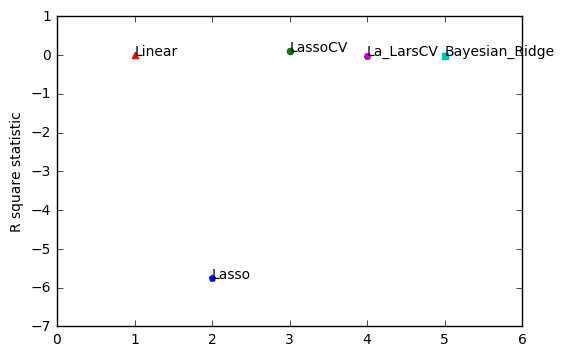

In [83]:
plt.scatter(B[0],A[0], color='r',marker='^', alpha=1)
plt.scatter(B[1],A[1], color='b',marker='p', alpha=1)
plt.scatter(B[2],A[2], color='g',marker='o', alpha=1)
plt.scatter(B[3],A[3], color='m',marker='H', alpha=1)
plt.scatter(B[4],A[4], color='c',marker='s', alpha=1)
#plt.show()
n=['Linear','Lasso','LassoCV','La_LarsCV','Bayesian_Ridge']
#l=['-0.00589536','-5.76074315','0.09918653','-0.01150757','-0.01150757']
for i, txt in enumerate(n):
    plt.annotate(txt, (B[i],A[i]))
plt.ylabel('R square statistic')
plt.show()

In [84]:
#x_train=np.ravel(x_train)
#from sklearn.svm import SVR
#svr_lin = SVR(kernel='linear', C=1e3)
#y_lin = svr_lin.fit(x_train, y_train)

In [85]:
clf=linear_model.SGDRegressor(loss='squared_loss', penalty='none', alpha=0.0001, epsilon=0.0001)
model2=clf.fit(x_train, y_train)
y_predict1=model2.predict(x_test)
R_SGD=r2_score(y_predict1, y_test)
print(R_SGD)

0.286818348546


C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [86]:
clf=linear_model.SGDRegressor(loss='huber', alpha=0.0001)
model3=clf.fit(x_train, y_train)
y_predict2=model3.predict(x_test)
R_SGD_h=r2_score(y_predict2, y_test)
print(R_SGD_h)

0.1882446836


C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [87]:
clf=linear_model.SGDRegressor(loss='epsilon_insensitive', penalty='none', alpha=0.0001)
model4=clf.fit(x_train, y_train)
y_predict3=model4.predict(x_test)
R_SGD_ep=r2_score(y_predict3, y_test)
print(R_SGD_ep)

0.326342946481


C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
from sklearn import tree
regr_1=tree.DecisionTreeRegressor()
model5=regr_1.fit(x_train, y_train)
y_predict4=model5.predict(x_test)
#y_1=regr_1.predict(x_test)
R_tree=r2_score(y_predict4, y_test)
print(R_tree)
#x_train.size, y_train.size, x_test.size, y_test.size

-0.393680463619


In [89]:
#x_train1=np.array(x_train)
#x_train1=np.resize(x_train1, (4126))
#x_train1.size

#plt.scatter(x_train1, y_train, color='darkorange')
#plt.plot(x_test, y_1, color='cornflowerblue')
#plt.show()

In [90]:
reg=linear_model.Ridge(alpha=0.5)
model6=reg.fit(x_train, y_train)
y_predict5=model6.predict(x_test)
R_Ridge=r2_score(y_predict5, y_test)
print(R_Ridge)

0.0513537691532


In [91]:
from sklearn.kernel_ridge import KernelRidge
clf_1=KernelRidge(alpha=1.0)
model7=clf_1.fit(x_train, y_train)
y_predict6=model7.predict(x_test)
R_KernelRidge=r2_score(y_predict6, y_test)
print(R_KernelRidge)

0.0640647203179


In [92]:
from sklearn.svm import SVR
svr_lin=SVR(kernel='rbf', C=1e3)
model8=svr_lin.fit(x_train, y_train)
y_predict7=model8.predict(x_test)
R_svr_rbf=r2_score(y_predict7, y_test)
print(R_svr_rbf)


C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-1.09780887561


In [93]:
from sklearn.svm import SVR
svr_lin=SVR(kernel='poly', C=1e3)
model8=svr_lin.fit(x_train, y_train)
y_predict8=model8.predict(x_test)
R_svr_poly=r2_score(y_predict8, y_test)
print(R_svr_poly)

C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0311309451067


In [94]:
from sklearn.svm import SVR
svr_lin=SVR(kernel='sigmoid', C=1e3)
model8=svr_lin.fit(x_train, y_train)
y_predict9=model8.predict(x_test)
R_svr_sig=r2_score(y_predict9, y_test)
print(R_svr_sig)

C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.000473169651765


In [95]:
#from sklearn.linear_model import Perceptron
#perp=Perceptron()
#model9=perp.fit(x_train, y_train)
#y_predict=model9.predict(x_test)
#R_perp=r2_score(y_predict, y_test)
#print(R_perp)


In [96]:
C=np.array([R_SGD, R_SGD_h, R_SGD_ep, R_tree, R_Ridge, R_KernelRidge, R_svr_rbf, R_svr_poly, R_svr_sig])
C

array([  2.86818349e-01,   1.88244684e-01,   3.26342946e-01,
        -3.93680464e-01,   5.13537692e-02,   6.40647203e-02,
        -1.09780888e+00,   3.11309451e-02,  -4.73169652e-04])

In [97]:
D=np.array(np.arange(1, 10.0, 1))
D

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

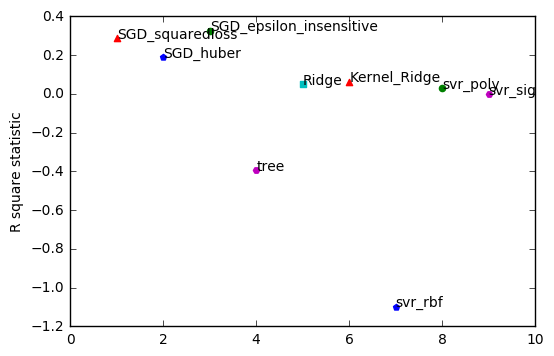

In [98]:
plt.scatter(D[0],C[0], color='r',marker='^', alpha=1)
plt.scatter(D[1],C[1], color='b',marker='p', alpha=1)
plt.scatter(D[2],C[2], color='g',marker='o', alpha=1)
plt.scatter(D[3],C[3], color='m',marker='H', alpha=1)
plt.scatter(D[4],C[4], color='c',marker='s', alpha=1)
plt.scatter(D[5],C[5], color='r',marker='^', alpha=1)
plt.scatter(D[6],C[6], color='b',marker='p', alpha=1)
plt.scatter(D[7],C[7], color='g',marker='o', alpha=1)
plt.scatter(D[8],C[8], color='m',marker='H', alpha=1)
#plt.scatter(C[4],D[4], color='c',marker='s', alpha=1)
#plt.show()
n=['SGD_squaredloss','SGD_huber','SGD_epsilon_insensitive','tree','Ridge','Kernel_Ridge','svr_rbf','svr_poly','svr_sig']
#l=['-0.00589536','-5.76074315','0.09918653','-0.01150757','-0.01150757']
for i, txt in enumerate(n):
    plt.annotate(txt, (D[i],C[i]))
plt.ylabel('R square statistic')
plt.show()